# imports

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# read csv

In [21]:
india = pd.read_csv("Unemployment in India.csv")

# data exploration

In [22]:
for c in india.columns:
    print(c)

Region
 Date
 Frequency
 Estimated Unemployment Rate (%)
 Estimated Employed
 Estimated Labour Participation Rate (%)
Area


In [23]:
india.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [24]:
india.shape

(768, 7)

In [25]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [26]:
india.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# data cleaning

In [27]:
india.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [28]:
india = india.dropna()

In [29]:
india = india.drop_duplicates()

In [30]:
india.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [31]:
india[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [32]:
india.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [33]:
india['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

# analysis

<function matplotlib.pyplot.show(close=None, block=None)>

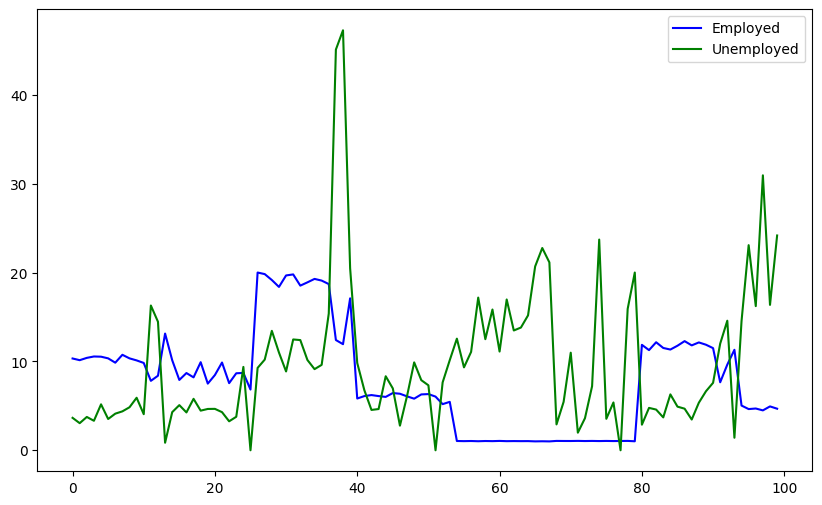

In [93]:
Employed = india[' Estimated Employed'].iloc[:100]
Unemployed = india[' Estimated Unemployment Rate (%)'].iloc[:100]

Employed = (Employed - Employed.min())/(Employed.max() - Employed.min()) * 19 + 1

plt.figure(figsize=(10,6))
plt.plot(Employed, label='Employed', color='blue')
plt.plot(Unemployed, label='Unemployed', color='green')
plt.legend()
plt.show

In [49]:
group = india.groupby(['Region','Area']).agg({' Estimated Unemployment Rate (%)': 'mean'})

In [69]:
group.style.bar(color="lightgreen")

In [76]:
india[['Day','Month','Year']] = india[' Date'].str.split('-', expand=True)     
#.str.split("-",expand=True,)
new_data = india.drop([' Date'],axis=1)
new_data

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,10871168.0,44.09,Urban,29,02,2020
750,West Bengal,Monthly,6.67,10806105.0,43.34,Urban,31,03,2020
751,West Bengal,Monthly,15.63,9299466.0,41.20,Urban,30,04,2020
752,West Bengal,Monthly,15.22,9240903.0,40.67,Urban,31,05,2020


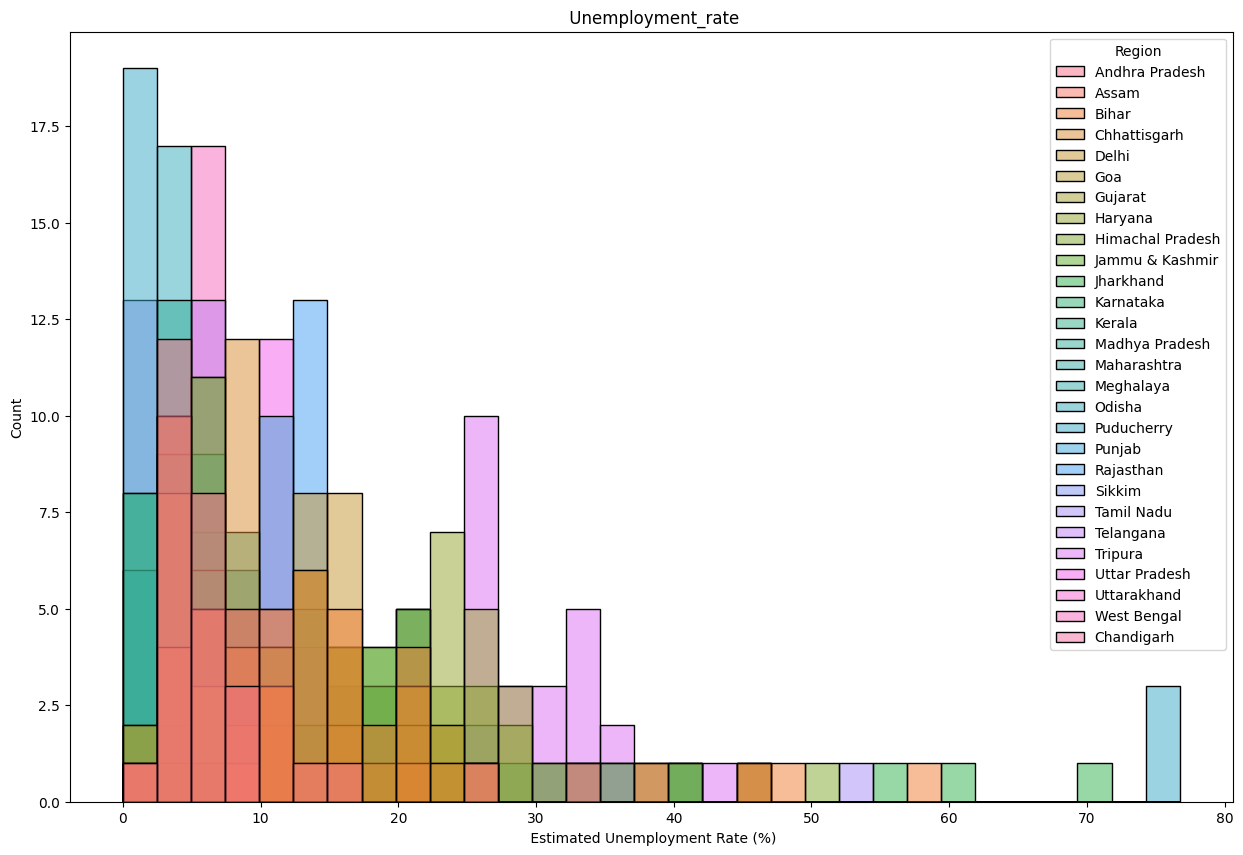

In [89]:
plt.figure(figsize=(15, 10))
plt.title(" Unemployment_rate")
sns.histplot(x=" Estimated Unemployment Rate (%)", hue="Region", data=india)
plt.show()

In [98]:
region = india.groupby(["Region"])[[' Estimated Unemployment Rate (%)', " Estimated Employed", " Estimated Labour Participation Rate (%)"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y=" Estimated Employed", color="Region", title="Average Employed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [109]:
unemployment = india[["Region", "Area", " Estimated Unemployment Rate (%)"]]

fig = px.sunburst(unemployment, path=['Area','Region'], values=' Estimated Unemployment Rate (%)',
                  title= 'Unemployment rate in every State and Area', height=500, color='Region')
fig.show()

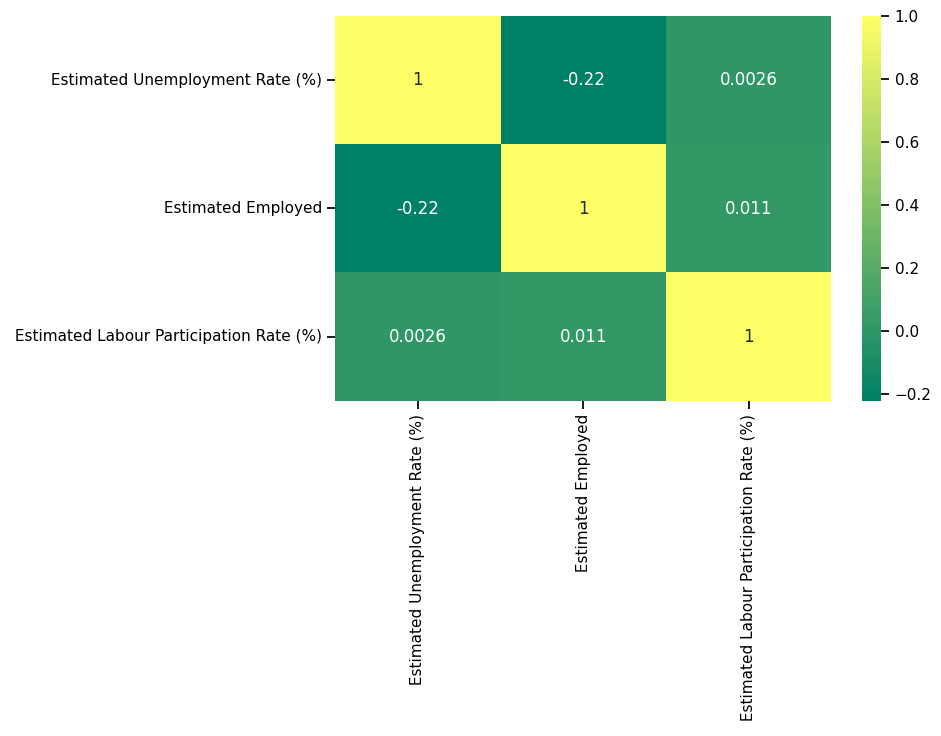

In [118]:
heat_maps = india[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(8,5))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');